In [1]:
import os
from PIL import Image #Python Imaging Library
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from feature import NPDFeature
from ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('datasets/features/feature', 'rb') as file:
    x = pickle.load(file)
with open('datasets/features/label', 'rb') as file:
    y = pickle.load(file)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 165600) (250, 165600) (750, 1) (250, 1)


0 base clf training accuracy:  0.942666666667
1
current validation accuracy:  0.868
1 base clf training accuracy:  0.929333333333
2
current validation accuracy:  0.836
2 base clf training accuracy:  0.930666666667
3
current validation accuracy:  0.828
3 base clf training accuracy:  0.881333333333
4
current validation accuracy:  0.832
4 base clf training accuracy:  0.904
5
current validation accuracy:  0.848


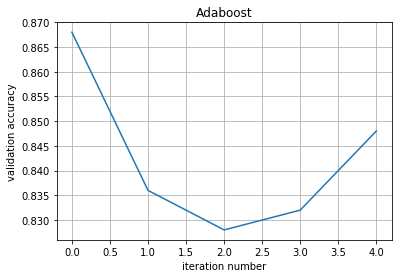

In [4]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3),5)
ada_clf.fit(X_train, y_train, X_test, y_test)
ada_clf.plotting()

In [5]:
ada_clf.get_report(X_test, y_test)

1


In [23]:
np.mean((ada_clf.predict(X_test, use_idx_end_at=4)==y_test).reshape(-1,))

5


0.84799999999999998

In [12]:
y_test.shape

(250, 1)